In [3]:
#installing pyspark
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
#initializing the pyspark session

from pyspark.sql import SparkSession
import pyspark

from pyspark.sql import SparkSession
import pyspark
conf = pyspark.SparkConf().setAppName("MASTER_2").setMaster("local")
conf.set("spark.sql.caseSensitive", "true")
conf.set("spark.debug.maxToStringFields", "100")
spark = SparkSession.builder.config(conf=conf).appName('MASTER_2').getOrCreate()

spark

In [10]:
#importing dataset into df 
df = spark.read.json("/content/Arts_Crafts_and_Sewing.json")
df.show(10)

+---------------+----------+-----+-------+--------------------+-----------+--------------+---------------+--------------------+--------------------+--------------+--------+----+
|_corrupt_record|      asin|image|overall|          reviewText| reviewTime|    reviewerID|   reviewerName|               style|             summary|unixReviewTime|verified|vote|
+---------------+----------+-----+-------+--------------------+-----------+--------------+---------------+--------------------+--------------------+--------------+--------+----+
|           null|0449819906| null|    5.0|I've read this bo...| 11 6, 2013|A3U4E9PIZ8OWH1| Shirley Curtis|{null, null, null...|   A  WONDERFUL BOOK|    1383696000|    true|   4|
|           null|0449819906| null|    5.0|Nicely written di...|02 28, 2017|A3945D2TJ0PI86|       M. Smith|{null, null, null...|                Nice|    1488240000|    true|null|
|           null|0449819906| null|    5.0|             love it|02 25, 2017|A2WZK72HLQ7SPT|Amazon Customer|{nul

In [11]:
#printing structure of the dataset

df.printSchema()

root
 |-- _corrupt_record: string (nullable = true)
 |-- asin: string (nullable = true)
 |-- image: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- overall: double (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- style: struct (nullable = true)
 |    |-- Color Name:: string (nullable = true)
 |    |-- Color:: string (nullable = true)
 |    |-- Design:: string (nullable = true)
 |    |-- Display Height:: string (nullable = true)
 |    |-- Edition:: string (nullable = true)
 |    |-- Format:: string (nullable = true)
 |    |-- Item Display Length:: string (nullable = true)
 |    |-- Item Package Quantity:: string (nullable = true)
 |    |-- Length:: string (nullable = true)
 |    |-- Material Type:: string (nullable = true)
 |    |-- Material:: string (nullable = true)
 |    |-- Metal Type:: string (nullable = true)
 

In [16]:
#printing number of rows in the dataset

df.count()

332332

In [14]:
#printing number of columns in the dataset

len(df.columns)

13

In [ ]:
#printing last 10 rows of database

df.tail(10)

[Row(asin='B0001DT3ZY', image=None, overall=5.0, reviewText='I just needed a hole puncher.  I am handicapped so I have very little hand strength.  The sure-grip handles were a god-send.  I also love the fact that there is a catch tray, built right into the punch, that prevents the little, paper circles that are cut out from flying everywhere until YOU empty them.  Simple and effective; just great.', reviewTime='11 25, 2011', reviewerID='A1RTR8KE4HU1YN', reviewerName='Lillehammer', style=Row(Color Name:=None, Color:=None, Design:=None, Format:=None, Package Quantity:=None, Package Type:=None, Size Name:=None, Size:=' Circle', Style Name:=None, Style:=None), summary='Great hole puncher', unixReviewTime=1322179200, verified=True, vote='5'),
 Row(asin='B0001DT3ZY', image=None, overall=4.0, reviewText="My job requires me to punch receipts, several hundred each day. The Fiskar stands up very well. Plus they have a good warranty.\nI usually don't buy products made in China, but this is a good

In [12]:
#changing name of the reviewerID, asin, overall, and reviewText columns

df = df.withColumnRenamed("reviewerID","userID").withColumnRenamed("asin","itemID").withColumnRenamed("overall","rating").withColumnRenamed("reviewText","review").withColumnRenamed("summary","review_summary")

In [13]:
#printing the summary of the database; number of rows, mean, max, min values of all columns data

df.summary().show()

+-------+--------------------+--------------------+------------------+--------------------+----------+--------------------+------------+--------------------+--------------------+-----------------+
|summary|     _corrupt_record|              itemID|            rating|              review|reviewTime|              userID|reviewerName|      review_summary|      unixReviewTime|             vote|
+-------+--------------------+--------------------+------------------+--------------------+----------+--------------------+------------+--------------------+--------------------+-----------------+
|  count|                   1|              332331|            332331|              332138|    332331|              332331|      332308|              332257|              332331|            52143|
|   mean|                null|2.9880354356698585E9| 4.340368488043547|                 1.0|      null|                null|         NaN|                15.0|1.4306249496556144E9|9.007480148835782|
| stddev|      

In [14]:
#creating new dataset of only itemID, userID, rating, review, review_summary columns from old dataset

df_new = df['itemID','userID','rating','review','review_summary']

In [15]:
#printing 10 rows of new dataset

df_new.show(10)

+----------+--------------+------+--------------------+--------------------+
|    itemID|        userID|rating|              review|      review_summary|
+----------+--------------+------+--------------------+--------------------+
|0449819906|A3U4E9PIZ8OWH1|   5.0|I've read this bo...|   A  WONDERFUL BOOK|
|0449819906|A3945D2TJ0PI86|   5.0|Nicely written di...|                Nice|
|0449819906|A2WZK72HLQ7SPT|   5.0|             love it|          Five Stars|
|0449819906|A1Q7YJ1NPE6E0W|   5.0|Good additional k...|Good Reference in...|
|0449819906|A2846L8Q507JC4|   5.0|A gazillion patte...|Extremely clear, ...|
|0449819906|A3V21ZT37Y242L|   2.0|Just ok. Read bet...|             Just ok|
|0449819906| A1GJKG5OAQQ69|   5.0|The best knitting...|Thank you for the...|
|0449819906|A1IQJ7PGO9I4MI|   5.0|This book is a mo...|         Magnificent|
|0449819906| AW3AYN77DSEA4|   5.0|excellent variety...|          Five Stars|
|0449819906|A3AJK82I35MLKA|   5.0|Another winner M....|         A must have|

In [17]:
#printing number of rows in new dataset

df_new.count()

332332

In [20]:
#printing summary of new dataset; number of rows, mean, min, max values of each columns

df_new.describe().toPandas() 

,summary,itemID,userID,rating,review,review_summary
0,count,332331,332331,332331,332138,332257
1,mean,2.9880354356698585E9,None,4.340368488043547,1.0,15.0
2,stddev,3.1500156529446254E9,None,1.1855815121813358,0.0,34.39269025326665
3,min,0449819906,A00181966XZUX7KEGYLH,1.0,\nCan't say enough good things about this mach...,
4,max,B00181B8S8,AZZZWDTD5URZ8,5.0,"~~~good,,,,, but not i have imagined",~~so many sweaters saved thanks to the Fuzz Wi...


In [22]:
#printing number of null values occurrences in each column in new dataset

from pyspark.sql.functions import isnan, when, count, col

df_new.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_new.columns]).show()

+------+------+------+------+--------------+
|itemID|userID|rating|review|review_summary|
+------+------+------+------+--------------+
|     1|     1|     1|   194|            75|
+------+------+------+------+--------------+



In [23]:
#finding all data from dataset where the userID is null

df_new.filter(df_new.userID.isNull()).show()

+------+------+------+------+--------------+
|itemID|userID|rating|review|review_summary|
+------+------+------+------+--------------+
|  null|  null|  null|  null|          null|
+------+------+------+------+--------------+



In [24]:
#finding all data from dataset where the itemID is null

df_new.filter(df_new.itemID.isNull()).show()

+------+------+------+------+--------------+
|itemID|userID|rating|review|review_summary|
+------+------+------+------+--------------+
|  null|  null|  null|  null|          null|
+------+------+------+------+--------------+



In [25]:
#finding all data from dataset where the rating is null

df_new.filter(df_new.rating.isNull()).show()

+------+------+------+------+--------------+
|itemID|userID|rating|review|review_summary|
+------+------+------+------+--------------+
+------+------+------+------+--------------+



In [26]:
#finding all data from dataset where the review is null

df_new.filter(df_new.review.isNull()).show()

+----------+--------------+------+------+--------------------+
|    itemID|        userID|rating|review|      review_summary|
+----------+--------------+------+------+--------------------+
|B00004THXH|A2OPTG6L4Z8UJC|   5.0|  null|          Five Stars|
|B00004Z2U8|A10QMQ0WC54KLU|   5.0|  null|          Five Stars|
|B00004Z2UD| A9BK461172UHX|   4.0|  null|          Four Stars|
|B00006IAHD|A1ROVL4AWYM9D6|   5.0|  null|                null|
|B00006IDOR| AT95J6Z1N9VW1|   5.0|  null|          Five Stars|
|B00006IE1Q|A23UV1HWEOGT0E|   5.0|  null|          Five Stars|
|B00006IFAG| AVBZUGY2J2T91|   5.0|  null|Very fun to draw ...|
|B0001DUD9O| A84ST4WZR91VW|   5.0|  null|          Five Stars|
|B0001DS5MQ|A1W9IBVCZBDMBW|   5.0|  null|          Five Stars|
|B0002Q8ZIG|A35UGHZCYS5WX6|   5.0|  null|          Five Stars|
|B0006OKGYU|A2FEOVTKJ78Y4D|   5.0|  null|          Five Stars|
|B0006VRX30|A2LK03RTCCDQR2|   5.0|  null|          Five Stars|
|B0007D63NI|A2ES10RRB7I6VV|   5.0|  null|          Five

In [18]:
#finding all data from dataset where the review_summary is null

df_new.filter(df_new.review_summary.isNull()).show()

+----------+--------------+------+--------------------+--------------+
|    itemID|        userID|rating|              review|review_summary|
+----------+--------------+------+--------------------+--------------+
|B00004THXH|A2IHAQY2JV6WR7|   5.0|Just what I was l...|          null|
|B00006IAHD|A1ROVL4AWYM9D6|   5.0|                null|          null|
|B00006IAGW| AV6UUM16WE8RE|   5.0|Perfect! Used the...|          null|
|B00006IC2T|A2HWP7F43XLNG7|   5.0|  Works as intended.|          null|
|B00006IDY9|A2QCPLBHH6GF9T|   5.0|Paper worked grea...|          null|
|B00006IFGJ|A13KDZG6350VST|   5.0|It arrived 3 days...|          null|
|B00024JRK8| A729CKUWFLBHW|   1.0|It actually puts ...|          null|
|B0007D63NI|A1H9AHIC7W1PPZ|   4.0|Great kit. Really...|          null|
|B0007OEE9M| ALUEP9UFXDQZF|   5.0|Nice set. The col...|          null|
|B0007ZHGWI|A297CKO2XCKB7L|   5.0|This product is r...|          null|
|B0009E34IW| AMPB503RB3P37|   5.0|Best embroidery t...|          null|
|B000B

In [19]:
#grouping data from dataset by the rating column and ordering it in ascending order
#we only have 5.0, 4.0, 3.0, 2.0, 1.0 and nan ratings

df_col = df_new.groupBy('rating').count().orderBy('count', ascending=False)
df_col.show(100)

+------+------+
|rating| count|
+------+------+
|   5.0|229165|
|   4.0| 45026|
|   3.0| 22525|
|   1.0| 22295|
|   2.0| 13320|
|  null|     1|
+------+------+



<Axes: ylabel='rating'>

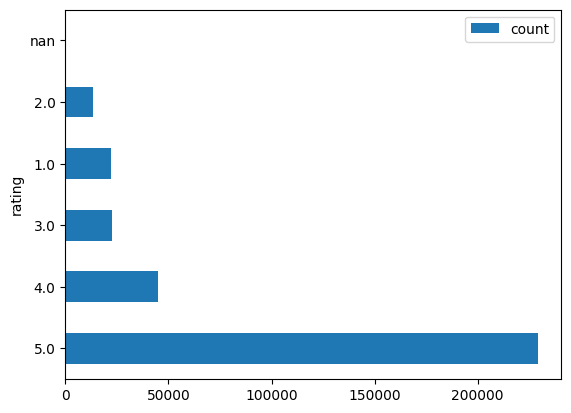

In [20]:
#visualizing the data from previous task using plot bar

import matplotlib.pyplot as plt
import numpy as np

pdf1=df_col.toPandas()
pdf1.plot(kind='barh',x='rating',y='count')

In [21]:
#droping and deleting all values that are null in review_summary and review columns

df_new = df_new.na.drop(subset=["review_summary","review"])

In [22]:
#printing all data that is null in the review_summary; we do not have any because we deleted them

df_new.filter(df_new.review_summary.isNull()).show()

+------+------+------+------+--------------+
|itemID|userID|rating|review|review_summary|
+------+------+------+------+--------------+
+------+------+------+------+--------------+



In [23]:
#printing all data that is null in the review; we do not have any because we deleted them

df_new.filter(df_new.review.isNull()).show()

+------+------+------+------+--------------+
|itemID|userID|rating|review|review_summary|
+------+------+------+------+--------------+
+------+------+------+------+--------------+



In [24]:
#grouping data from dataset by the rating column and ordering it in ascending order
#we only have 5.0, 4.0, 3.0, 2.0 and 1.0 ratings

df_col1 = df_new.groupBy('rating').count().orderBy('rating', ascending=False)
df_col1.show(100)

+------+------+
|rating| count|
+------+------+
|   5.0|228952|
|   4.0| 44995|
|   3.0| 22519|
|   2.0| 13319|
|   1.0| 22284|
+------+------+



In [157]:
#printing precentage of the rating from whole dataset

print('precentage of the rating 5:', 228952/332069 *100)
print('precentage of the rating 4:', 44995/332069 *100)
print('precentage of the rating 3:', 22519/332069 *100)
print('precentage of the rating 2:', 13319/332069 *100)
print('precentage of the rating 1:', 22284/332069 *100)

precentage of the rating 5: 68.94711641255282
precentage of the rating 4: 13.549894750789745
precentage of the rating 3: 6.781421933393361
precentage of the rating 2: 4.0109133945053586
precentage of the rating 1: 6.710653508758722


<Axes: ylabel='rating'>

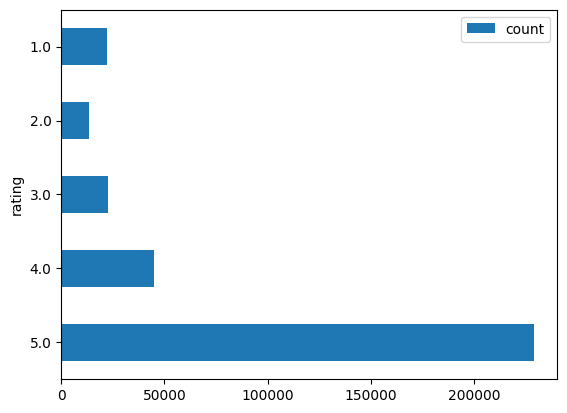

In [25]:
#visualizing the data of grouping all reviews based on the rating value

pdf2=df_col1.toPandas()
pdf2.plot(kind='barh',x='rating',y='count')

In [26]:
#grouping all data based on itemID and counting the occurance of the items 
#printing first 10 most occuring items

df_col2 = df_new.groupBy('itemID').count().orderBy('count', ascending=False)
df_col2.show(10)

+----------+-----+
|    itemID|count|
+----------+-----+
|B000WOM50W| 3580|
|B000F7DPEQ| 3415|
|B000P0LNRE| 2633|
|B000980L02| 2422|
|B000W5R6UA| 2370|
|B000BQKGR0| 2087|
|B000B7Q9KM| 2056|
|B0014DGXU8| 1996|
|B000Y00DDK| 1925|
|B00172XBQA| 1924|
+----------+-----+
only showing top 10 rows



In [27]:
#grouping all data based on userID and counting the occurance of the user 
#printing first 10 most occuring users in dataset

df_col3 = df_new.groupBy('userID').count().orderBy('count', ascending=False)
df_col3.show(10)

+--------------+-----+
|        userID|count|
+--------------+-----+
| ALYZJ7W14YS26|   61|
|A2U6VP21H9UVV3|   46|
|A3E5V5TSTAY3R9|   46|
|A13OFOB1394G31|   44|
|A2OYDT4I6AK54P|   41|
|A1GYEGLX3P2Y7P|   36|
| AUQBDRIQFTRNM|   35|
|A1PAGHECG401K1|   34|
|A1BBCMQSEJN0PP|   32|
|A24FX30B20WLMV|   31|
+--------------+-----+
only showing top 10 rows



In [28]:
#select user with id ALYZJ7W14YS26 and print the summary of users occurrence, theirs average, min, max rating value

df.filter(df.userID == "ALYZJ7W14YS26").describe().show()

+-------+---------------+-------------+-------------------+--------------------+-----------+-------------+------------+--------------------+--------------------+-----------------+
|summary|_corrupt_record|       itemID|             rating|              review| reviewTime|       userID|reviewerName|      review_summary|      unixReviewTime|             vote|
+-------+---------------+-------------+-------------------+--------------------+-----------+-------------+------------+--------------------+--------------------+-----------------+
|  count|              0|           61|                 61|                  61|         61|           61|          61|                  61|                  61|               21|
|   mean|           null|1.574866745E9|  4.950819672131147|                null|       null|         null|        null|                null|1.4287387278688524E9|7.714285714285714|
| stddev|           null|         null|0.21803894974650145|                null|       null|        

In [38]:
#print the summary of dataset without the null values

df_new.describe().toPandas()

,summary,itemID,userID,rating,review,review_summary
0,count,332069,332069,332069,332069,332069
1,mean,2.9880354356698585E9,None,4.340119071638726,1.0,15.0
2,stddev,3.1500156529446254E9,None,1.185750389503351,0.0,34.39269025326665
3,min,0449819906,A00181966XZUX7KEGYLH,1.0,\nCan't say enough good things about this mach...,
4,max,B00181B8S8,AZZZWDTD5URZ8,5.0,"~~~good,,,,, but not i have imagined",~~so many sweaters saved thanks to the Fuzz Wi...


In [29]:
#printing the distinct/unique values of userID, itemID - printing all unique users and items that are in the dataset

from pyspark.sql.functions import count as _count
from pyspark.sql.functions import countDistinct

df_new.select(countDistinct('userID')).show()
df_new.select(countDistinct('itemID')).show()

+----------------------+
|count(DISTINCT userID)|
+----------------------+
|                248378|
+----------------------+

+----------------------+
|count(DISTINCT itemID)|
+----------------------+
|                  4130|
+----------------------+



In [30]:
#displaying the example of review text

df_new.select('review_summary').show(2)

+-----------------+
|   review_summary|
+-----------------+
|A  WONDERFUL BOOK|
|             Nice|
+-----------------+
only showing top 2 rows



In [ ]:
#NLP - starting NLP

In [32]:
#creating new dataframe of only review and rating columns 

df_new['review','rating'].toPandas()

,review,rating
0,I've read this book already and I've got plans...,5.0
1,Nicely written directions.,5.0
2,love it,5.0
3,Good additional knitting reference to have ava...,5.0
4,"A gazillion pattern stitches, lucidly explaine...",5.0
...,...,...
332064,Great product. Received it super fast. Will be...,5.0
332065,I've hand repaired things for years with an ol...,5.0
332066,perfect for us to use with our awl....you will...,5.0
332067,Exactly what I needed for a small project that...,5.0


In [34]:
#selecting only review column and transforming it to dataframe

df_review = df_new.select('review')
df_review = df_review.toPandas()

In [35]:
df_review

,review
0,I've read this book already and I've got plans...
1,Nicely written directions.
2,love it
3,Good additional knitting reference to have ava...
4,"A gazillion pattern stitches, lucidly explaine..."
...,...
332064,Great product. Received it super fast. Will be...
332065,I've hand repaired things for years with an ol...
332066,perfect for us to use with our awl....you will...
332067,Exactly what I needed for a small project that...


In [36]:
#printing 10th review text

df_review['review'][0]

"I've read this book already and I've got plans for using it in future projects.  I'm DELIGHTED with the patterns in it and the advice and suggestions are just as good as you would expect from Melissa Leapman.  I'm so glad that I bought this.  As a lifelong and addicted knitter, this has been a valuable addition to my already good sized book collection.  Thanks Melissa for this very special knitting treat."

In [37]:
#calculating total words of every review text for every row and saving it as new column in the dataframe

df_review['totalwords'] = [len(x.split()) for x in df_review['review'].tolist()]

In [38]:
#calculating total char of every review text for every row and saving it as new column in the dataframe

df_review['totalchar'] = [len(x) for x in df_review['review'].tolist()]

In [39]:
#calculating word density of every review text for every row and saving it as new column in the dataframe

df_review['worddensity'] = df_review['totalchar'] / (df_review['totalwords']+1)

In [40]:
#displaying newly made dataframe

df_review

,review,totalwords,totalchar,worddensity
0,I've read this book already and I've got plans...,72,408,5.589041
1,Nicely written directions.,3,26,6.500000
2,love it,2,7,2.333333
3,Good additional knitting reference to have ava...,44,236,5.244444
4,"A gazillion pattern stitches, lucidly explaine...",53,337,6.240741
...,...,...,...,...
332064,Great product. Received it super fast. Will be...,21,125,5.681818
332065,I've hand repaired things for years with an ol...,61,333,5.370968
332066,perfect for us to use with our awl....you will...,22,120,5.217391
332067,Exactly what I needed for a small project that...,25,136,5.230769


In [41]:
#counting all words in the dataframe

df_review['totalwords'].sum()

10961712

In [42]:
#counting all chars in the dataframe

df_review['totalchar'].sum()

58491249

In [85]:
#printing summary of the dataframe with totalwords, totalchar, worddensity columns; printing its mean, min, max values

df_review.describe()

,totalwords,totalchar,worddensity,rating
count,332069.000000,332069.000000,332069.000000,332069.000000
mean,33.010344,176.141853,4.884095,4.340119
std,48.440712,261.154349,0.853982,1.185750
min,1.000000,1.000000,0.500000,1.000000
25%,7.000000,39.000000,4.583333,4.000000
50%,21.000000,109.000000,5.000000,5.000000
75%,40.000000,209.000000,5.348837,5.000000
max,3739.000000,19323.000000,47.000000,5.000000


In [96]:
#creating a function for NLP methods; removal of stop words and puncations; lemmatization and tokenization

#!pip install nltk 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

nltk.download('all')

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

words = set(nltk.corpus.words.words())
    
def tokenization(text):
    
    text = text.lower()

    #remove punctuation and transforming it into tokens
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(text)
    
    #remove stop words
    word_tokens2 = [w for w in word_tokens if not w.lower() in stop_words]
    
    #lemmatization 
    word_tokens4 = [lemmatizer.lemmatize(w, 'v') for w in word_tokens2 if not '' ]
  
    return(word_tokens4)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [97]:
#example of newly created function

tokenization('Eighty-seven miles to go, yet.  Onward!')

['eighty', 'seven', 'miles', 'go', 'yet', 'onward']

In [98]:
#applying it to the whole dataset; adding new column words in the dataset and storing it there

df_review['words'] = df_review['review'].apply(lambda x : tokenization(x)) 

In [99]:
#displaying the new dataset with new column words - column after NLP

df_review

,review,totalwords,totalchar,worddensity,words,rating
0,I've read this book already and I've got plans...,72,408,5.589041,"[read, book, already, get, plan, use, future, ...",5.0
1,Nicely written directions.,3,26,6.500000,"[nicely, write, directions]",5.0
2,love it,2,7,2.333333,[love],5.0
3,Good additional knitting reference to have ava...,44,236,5.244444,"[good, additional, knit, reference, available,...",5.0
4,"A gazillion pattern stitches, lucidly explaine...",53,337,6.240741,"[gazillion, pattern, stitch, lucidly, explain,...",5.0
...,...,...,...,...,...,...
332064,Great product. Received it super fast. Will be...,21,125,5.681818,"[great, product, receive, super, fast, use, sp...",5.0
332065,I've hand repaired things for years with an ol...,61,333,5.370968,"[hand, repair, things, years, old, sew, awl, f...",5.0
332066,perfect for us to use with our awl....you will...,22,120,5.217391,"[perfect, us, use, awl, need, heavy, duty, sew...",5.0
332067,Exactly what I needed for a small project that...,25,136,5.230769,"[exactly, need, small, project, require, tiny,...",5.0


In [102]:
#concatenating all words rows into one big text - we are left with one big text of words  

all_reviews_raw = []
all_reviews =[all_reviews_raw.extend(x) for x in df_review['words']]

In [103]:
all_reviews_raw

['read',
 'book',
 'already',
 'get',
 'plan',
 'use',
 'future',
 'project',
 'delight',
 'pattern',
 'advice',
 'suggestions',
 'good',
 'would',
 'expect',
 'melissa',
 'leapman',
 'glad',
 'buy',
 'lifelong',
 'addict',
 'knitter',
 'valuable',
 'addition',
 'already',
 'good',
 'size',
 'book',
 'collection',
 'thank',
 'melissa',
 'special',
 'knit',
 'treat',
 'nicely',
 'write',
 'directions',
 'love',
 'good',
 'additional',
 'knit',
 'reference',
 'available',
 'electronic',
 'format',
 'like',
 'easy',
 'jump',
 'one',
 'bite',
 'information',
 'another',
 'since',
 'sure',
 'link',
 'topics',
 'would',
 'available',
 'kindle',
 'format',
 'gazillion',
 'pattern',
 'stitch',
 'lucidly',
 'explain',
 'illustrations',
 'one',
 'page',
 'instructions',
 'thorough',
 'guide',
 'basic',
 'techniques',
 'appendix',
 'get',
 'full',
 'pattern',
 'stitch',
 'easily',
 'adapt',
 'straightforward',
 'knit',
 'project',
 'straight',
 'circular',
 'needle',
 'useful',
 'book',
 'ok',
 '

In [104]:
#printing number of only unique words from the all_reviews_raw - big text

len(set(all_reviews_raw))

48929

In [105]:
#finding most occuring words from all text in the dataset

from nltk.text import FreqDist
review_fd = FreqDist(all_reviews_raw)
review_fd

FreqDist({'use': 121266, 'great': 83855, 'work': 77382, 'make': 57994, 'get': 51705, 'love': 51241, 'good': 50459, 'color': 49651, 'buy': 45875, 'product': 43869, ...})

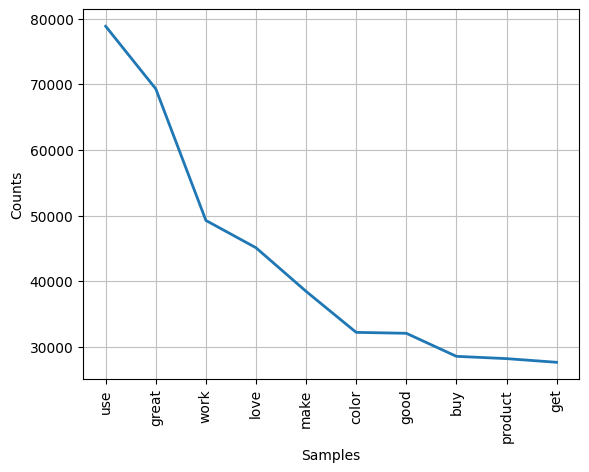

<Axes: xlabel='Samples', ylabel='Counts'>

In [139]:
#plot of 10 common words from whole dataset

review_fd.plot(10) 

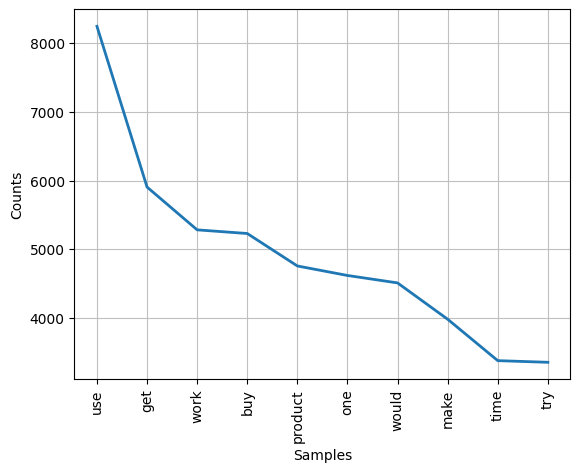

<Axes: xlabel='Samples', ylabel='Counts'>

In [124]:
#finding most occuring words from review text in the dataset that are rated with 1.0

all_reviews_1_raw = []
df_1 = df_review[df_review['rating'] == 1]
[all_reviews_1_raw.extend(x) for x in df_1['words']]

#plot of 10 common words from whole dataset that are rated with 1.0
review_1_fd = FreqDist(all_reviews_1_raw)
review_1_fd.plot(10)

In [140]:
#printing most occuring words from review text in the dataset that are rated with 1.0

review_1_fd

FreqDist({'use': 8239, 'get': 5906, 'work': 5285, 'buy': 5232, 'product': 4761, 'one': 4623, 'would': 4515, 'make': 3988, 'time': 3387, 'try': 3363, ...})

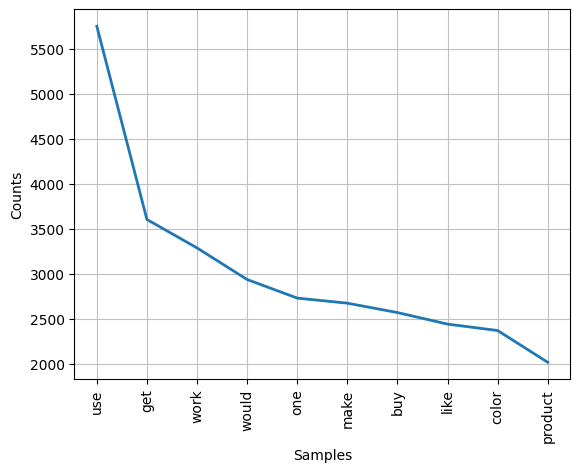

<Axes: xlabel='Samples', ylabel='Counts'>

In [141]:
#finding most occuring words from review text in the dataset that are rated with 2.0

all_reviews_2_raw = []
df_2 = df_review[df_review['rating'] == 2]
[all_reviews_2_raw.extend(x) for x in df_2['words']]

#ploting most occuring words from review text in the dataset that are rated with 2.0

from nltk.text import FreqDist
review_2_fd = FreqDist(all_reviews_2_raw)
review_2_fd.plot(10) 

In [142]:
#printing most occuring words from review text in the dataset that are rated with 2.0

review_2_fd

FreqDist({'use': 5746, 'get': 3606, 'work': 3291, 'would': 2941, 'one': 2735, 'make': 2679, 'buy': 2575, 'like': 2447, 'color': 2376, 'product': 2024, ...})

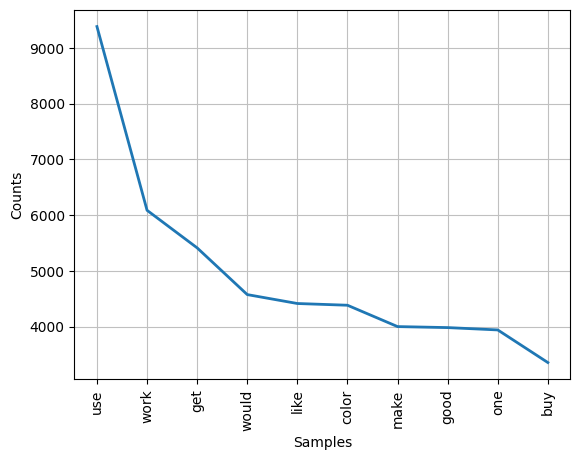

<Axes: xlabel='Samples', ylabel='Counts'>

In [143]:
#finding most occuring words from review text in the dataset that are rated with 3.0

all_reviews_3_raw = []
df_3 = df_review[df_review['rating'] == 3]
all_reviews_3 =[all_reviews_3_raw.extend(x) for x in df_3['words']]

#ploting most occuring words from review text in the dataset that are rated with 3.0

review_3_fd = FreqDist(all_reviews_3_raw)
review_3_fd.plot(10) 

In [144]:
#printing most occuring words from review text in the dataset that are rated with 3.0

review_3_fd

FreqDist({'use': 9384, 'work': 6088, 'get': 5414, 'would': 4576, 'like': 4416, 'color': 4385, 'make': 4002, 'good': 3984, 'one': 3942, 'buy': 3357, ...})

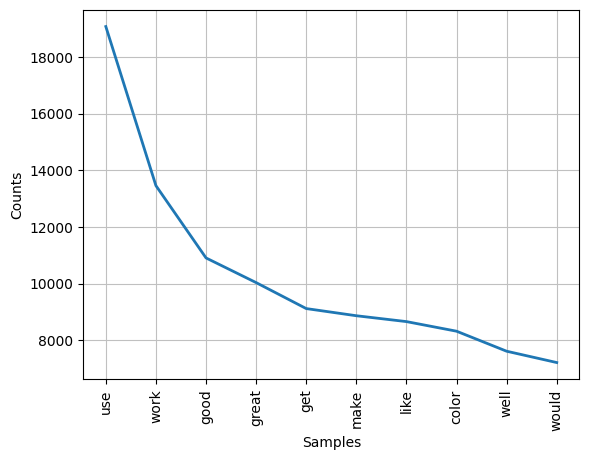

<Axes: xlabel='Samples', ylabel='Counts'>

In [145]:
#finding most occuring words from review text in the dataset that are rated with 4.0

all_reviews_4_raw = []
df_4 = df_review[df_review['rating'] == 4]
[all_reviews_4_raw.extend(x) for x in df_4['words']]

#ploting most occuring words from review text in the dataset that are rated with 4.0

review_4_fd = FreqDist(all_reviews_4_raw)
review_4_fd.plot(10) 

In [146]:
#printing most occuring words from review text in the dataset that are rated with 4.0

review_4_fd

FreqDist({'use': 19074, 'work': 13456, 'good': 10903, 'great': 10032, 'get': 9115, 'make': 8862, 'like': 8655, 'color': 8316, 'well': 7609, 'would': 7209, ...})

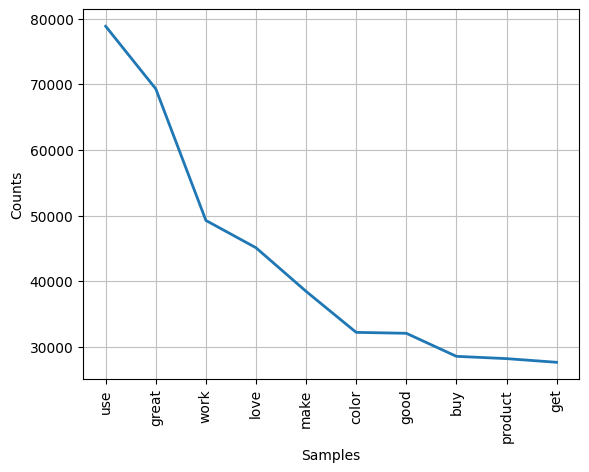

<Axes: xlabel='Samples', ylabel='Counts'>

In [147]:
#finding most occuring words from review text in the dataset that are rated with 5.0

all_reviews_5_raw = []
df_5 = df_review[df_review['rating'] == 5]
[all_reviews_5_raw.extend(x) for x in df_5['words']]

#ploting most occuring words from review text in the dataset that are rated with 5.0
from nltk.text import FreqDist
review_5_fd = FreqDist(all_reviews_5_raw)
review_5_fd.plot(10) 

In [148]:
#printing most occuring words from review text in the dataset that are rated with 2.0

review_5_fd

FreqDist({'use': 78823, 'great': 69294, 'work': 49262, 'love': 45103, 'make': 38463, 'color': 32220, 'good': 32081, 'buy': 28571, 'product': 28224, 'get': 27664, ...})

In [ ]:
#END